<a href="https://colab.research.google.com/github/andrewsknight/DeepLearning-NLP-Models/blob/main/PracticaNLP_Andr%C3%A9sCaballero2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PASO 1: DESCARGA DEL DATASET Y EXPLORACIÓN DE DATOS**

In [ ]:
#Vemos que el archivo nos lo da en formato JSON, así que importamos las librería necesarias
import os
import json
import gzip
import pandas as pd
from google.colab import drive

from urllib.request import urlopen


In [ ]:
#Monto el drive para cargar el dataset de reviews previamente descargado de amazón.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Creo una lista de diccionarios y comenzamos con una primera exploración de los datos.

data = []
with gzip.open('/content/drive/My Drive/Musical_Instruments.json.gz') as f:
    for l in f:
        data.append(json.loads(l))

# total length of list
print(len(data))

# first row of the list
print(data[0])



1512530
{'overall': 5.0, 'vote': '90', 'verified': False, 'reviewTime': '08 9, 2004', 'reviewerID': 'AXHY24HWOF184', 'asin': '0470536454', 'style': {'Format:': ' Paperback'}, 'reviewerName': 'Bendy', 'reviewText': 'Crocheting for Dummies by Karen Manthey & Susan Brittain is a wonderfully thorough and very informative book for anyone wanting to learn to crochet and or wanting to freshen up their skills.\n\nThe book reads like a storybook in paragraph form.  Everything is explained in great detail from choosing yarns and hooks, to how to work a large array of crochet stitches, to how to read a pattern, right down to how to care for ones crocheted items.\n\nThe stitch drawings are clear and expertly done making learning new stitches so much easier.\n\nThe book has both a contents page and an index for easy referral.  I especially liked the fact that an index was included.  So many crochet books do not include this.  The index makes it very easy to find information on a particular topic qu

In [ ]:
print(data[10])

{'overall': 5.0, 'verified': True, 'reviewTime': '11 22, 2016', 'reviewerID': 'A26EU1X4VDNT4Z', 'asin': '0470536454', 'style': {'Format:': ' Paperback'}, 'reviewerName': 'Christine Donofrio', 'reviewText': 'Excellent training book for beginners!', 'summary': 'Five Stars', 'unixReviewTime': 1479772800}


**PASO 2: ETAPA DE PREPROCESADO DE TEXTO**

In [ ]:
# A simple vista veo que podríamos filtrar el dataset por aquellas reseñas que están verificadas.
# Comprobamos si no perdemos muchos datos.
true = sum( dic['verified'] for dic in data if 'verified' in dic and  dic['verified'])
false = sum(not dic['verified'] for dic in data if 'verified' in dic and not dic['verified'])


In [ ]:
print(true)
print(false)

1346124
166406


In [ ]:
#Veo que aunque perdemos una buena cantidad de datos, más adelante reduciremos bastante la cantidad de datos para poder procesarlos con la humilde gpu que nos proporciona Colab, así que lo filtramos.
data_filtered = [dic for dic in data if dic.get('verified') == True]


In [ ]:
# Hay claves que no necesitamos, así que nos quedamos solo con las valoraciones y las reseñas.


new_dict = [{k: v for k, v in dic.items() if k in ('overall', 'reviewText')} for dic in data_filtered]

In [ ]:

print(new_dict[40]['reviewText'])
print(len(new_dict))

Like all "..........For Dummies" books this one gives good basic information. Once a so-so crochet'er,  it helped me remember a lot such as: Easy on the tension and try to keep it consistent , to remember to make that extra chain stitch when you begin the next row and always, ALWAYS  Y/O= yarn over!!l
1346124


In [ ]:
#Vemos que la lista de diccionarios es demasiado grande y nos va a llevar mucho tiempo ejecutar algunas funciones
#asi que la filtro obteniendo un pequeño porcentaje de los datos de manera aleatoria con la funcion random.sample
import random
dict_reduce = random.sample(new_dict, int(len(new_dict)* 0.08))

In [ ]:
print(len(dict_reduce))

107689


In [ ]:
#Instalamos esta librería que nos permitirá convertir de numero a letras, dígitos que nos vayamos encontrando
!pip install num2words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=450045c3e4be883dfa525554e2570426bd722ae8b213029d5d0ff800145d82e9
  Stored in directory: /root/.cache/pip/wheels/70/4a/46/1309fc853b8d395e60bafaf1b6df7845bdd82c95fd59dd8d2b
Successfully built docopt


In [ ]:
#Creamos una variable con todas las reviews para examinar sus palabras

text = ''
for dic in new_dict:
  if 'reviewText' in dic:
    text += dic['reviewText']

In [ ]:
words_nltk = text.lower().split()
words_nltk[:10]

['very',
 'helpful...easy',
 'to',
 'understand',
 'and',
 'a',
 'prompt',
 'service',
 'toomy',
 'girlfriend']

In [ ]:
#Observamos las palabras mas comunes y las contamos

from collections import Counter

wf = Counter(words_nltk)
wf_most_common = wf.most_common(10)
print(wf_most_common)

[('the', 2669441), ('and', 1596303), ('a', 1590112), ('i', 1465178), ('to', 1405440), ('it', 1176966), ('for', 904792), ('is', 879375), ('of', 732225), ('this', 680961)]


In [ ]:
#Creamos dos variables para graficar las palabras más comunes

words = [w[0] for w in wf_most_common]
freqs = [w[1] for w in wf_most_common]

In [ ]:
freqs, words = zip(*sorted(zip(freqs, words)))

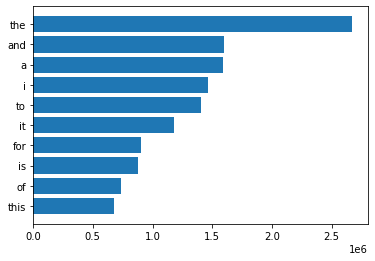

In [ ]:
#Vemos que las preposiciones y artículos llevan el mando como era de esperar.

from matplotlib import pyplot as plt

plt.barh(words, freqs)
plt.show()

**Primera conclusión**:


Obviamente vemos que debemos hacer un stop words y eliminar todas las palabras que no nos sirven como las preposiciones y árticulos que no van a aportar nada al modelo

In [ ]:
#Observamos con enegramas las palabras y vemos que tenemos.

from nltk import ngrams
from nltk.probability import FreqDist
bigrams_ = list(ngrams(words_nltk, 2))
trigrams_ = list(ngrams(words_nltk, 3))

In [ ]:
bigrams_[:10] #Vemos mucha preposición....

[('very', 'helpful...easy'),
 ('helpful...easy', 'to'),
 ('to', 'understand'),
 ('understand', 'and'),
 ('and', 'a'),
 ('a', 'prompt'),
 ('prompt', 'service'),
 ('service', 'toomy'),
 ('toomy', 'girlfriend'),
 ('girlfriend', 'use')]

In [ ]:
trigrams_[:10]

[('very', 'helpful...easy', 'to'),
 ('helpful...easy', 'to', 'understand'),
 ('to', 'understand', 'and'),
 ('understand', 'and', 'a'),
 ('and', 'a', 'prompt'),
 ('a', 'prompt', 'service'),
 ('prompt', 'service', 'toomy'),
 ('service', 'toomy', 'girlfriend'),
 ('toomy', 'girlfriend', 'use'),
 ('girlfriend', 'use', 'quite')]

In [ ]:
bg_freq = FreqDist(bigrams_)
tg_freq = FreqDist(trigrams_)

In [ ]:
bg_freq.most_common(10) #Vemos que las palabras más comunes, para nuestro objetivo, no nos aportan ninguna información.

[(('of', 'the'), 190500),
 (('for', 'the'), 148137),
 (('on', 'the'), 130230),
 (('it', 'is'), 127248),
 (('is', 'a'), 125709),
 (('in', 'the'), 119465),
 (('for', 'a'), 118495),
 (('and', 'the'), 116646),
 (('i', 'have'), 111685),
 (('with', 'the'), 103661)]

In [ ]:
bg_freq_most_common = bg_freq.most_common(10)
bgs_ = [str(bg[0]) for bg in bg_freq_most_common]
bgs_f_ = [bg[1] for bg in bg_freq_most_common]

tg_freq_most_common = tg_freq.most_common(10)
tgs_ = [str(tg[0]) for tg in tg_freq_most_common]
tgs_f_ = [tg[1] for tg in tg_freq_most_common]

In [ ]:
bgs_f_, bgs_ = zip(*sorted(zip(bgs_f_, bgs_)))
tgs_f_, tgs_ = zip(*sorted(zip(tgs_f_, tgs_)))

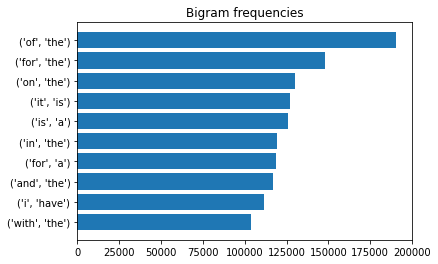

In [ ]:
#lo dicho probaremos de nuevo sin las stopwords

plt.barh(bgs_, bgs_f_)
plt.title('Bigram frequencies')
plt.show()

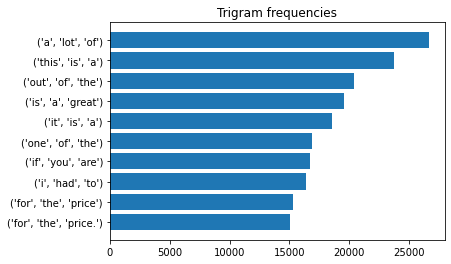

In [ ]:
#Aqui observamos palabras juntas que dicen mucho, como 'on of the' o 'a lot of', que seguramente sea una reseña que destaque algo problamente bueno.


plt.barh(tgs_, tgs_f_)
plt.title('Trigram frequencies')
plt.show()

**Segunda conclusión :**

Visto lo visto, crearemos una función para tokenizar, eliminar las stop words, eliminar espacios, convertir a minúsculas y lematizar, y convertir dígitos a palabras.

**DEFINIMOS UNA FUNCIÓN PARA PROCESAR LOS DATOS Y DEFINIMOS OTRA MÁS PARA IMPLEMENTAR EL PROCESADO EN CADA DICCIONARIO**

In [ ]:
import unicodedata
from num2words import num2words
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#FUNCIÓN PARA PROCESAR LOS DATOS

def nltk_cleaner(text, tokenizer, sw_list, lemmatizer):
    clean_text = list()

    # Eliminar acentos, signos extraños etc
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Separar palabras eliminando signos de puntuación
    for word in tokenizer.tokenize(text):

        # Eliminar stop words
        if word not in sw_list:

        # Eliminar espacios sobrantes, convertir a minúsculas y lematizar
            clean_word = lemmatizer.lemmatize(word).lower().strip()

        # Convertir dígitos a palabras
            if clean_word.isdigit():
                clean_word = num2words(clean_word, lang='en')

            clean_text.append(clean_word)

    return ' '.join(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
tokenizer = RegexpTokenizer(r'\w+')
sw_list = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

In [ ]:
#FUNCIÓN PARA SUSTITUIR LOS DATOS PROCESADOS

def procces_list(data_list):
  for dic in data_list:
    if 'reviewText' in dic:
      dic['reviewText'] = nltk_cleaner(dic['reviewText'],tokenizer, sw_list, lemmatizer )

  return data_list



In [ ]:
#Ejecutamos
data_process = procces_list(dict_reduce)

In [ ]:
#Observamos que algunos diccionarios no tienen reseñas. Como no son tantos para afectarnos al dataset, los eliminamos.
data_final= [dic for dic in data_process if 'reviewText' in dic]

**Tras el preprocesado observamos de nuevo los datos y vemos que tenemos:**

In [ ]:
text_final = ''

for dic in data_final:
  text_final += dic['reviewText']

In [ ]:
words_nltk_final = text_final.lower().split()
words_nltk_final[:10]

['well',
 'i',
 'see',
 'post',
 'critical',
 'review',
 'one',
 'not',
 'getting',
 'correct']

In [ ]:
wf_final = Counter(words_nltk_final)
wf_most_common_final = wf_final.most_common(10)
print(wf_most_common_final)

#Vemos que 'i' , 'the', e 'it' son palabras que para un analisis de sentimientos no nos va a aportar mucho, así que las eliminamos.

[('i', 128332), ('one', 26835), ('the', 26600), ('great', 24384), ('sound', 24289), ('it', 21404), ('guitar', 20846), ('good', 19926), ('like', 16371), ('use', 14935)]


In [ ]:
#Creo función para eliminar palabras que nos aportan nada al modelo y que la función de stopWords no nos ha eliminado.

def delete_words(lista, clave):
  for dic in lista:
    words = dic[clave].split()
    new_words = []
    for word in words:
      if word not in ['the', 'i', 'it']:
        new_words.append(word)
    dic[clave] = ' '.join(new_words)

delete_words(data_final, 'reviewText')


Observamos el texto más limpio y con mayor sentido.

In [ ]:
from nltk import ngrams
from nltk.probability import FreqDist

bigrams_final = list(ngrams(words_nltk_final, 2))
trigrams_final = list(ngrams(words_nltk_final, 3))
bigrams_final[:10]

In [ ]:
trigrams_final[:10]

[('well', 'i', 'see'),
 ('i', 'see', 'post'),
 ('see', 'post', 'critical'),
 ('post', 'critical', 'review'),
 ('critical', 'review', 'one'),
 ('review', 'one', 'not'),
 ('one', 'not', 'getting'),
 ('not', 'getting', 'correct'),
 ('getting', 'correct', 'product'),
 ('correct', 'product', 'two')]

In [ ]:
import numpy as np
import pandas as pd
from collections import Counter # Exploración
from nltk import ngrams # Exploración
from nltk.probability import FreqDist # Exploración
import unicodedata # Preprocesado



from sklearn.model_selection import train_test_split # Modelado
from sklearn.pipeline import Pipeline # Modelado
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Modelado
from sklearn.feature_selection import chi2 # Reporte
from sklearn.linear_model import LogisticRegression # Reporte
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve # Reporte



In [ ]:
# Convertimos nuestro diccionario en un dataframe con dos columnas (reseñas, sentimientos, eliminamos los NA)
reviews_text = []
reviews_sentiment = []

for review in data_final:
    reviews_text.append(review.get('reviewText'))
    reviews_sentiment.append(review.get('overall'))

df = pd.DataFrame({
    'review': reviews_text,
    'sentiment': reviews_sentiment
})
df.dropna(subset=['review', 'sentiment'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df.shape

(107634, 2)

In [ ]:
#Creamos una variable con todas las palabras que tenemos

df['review']
words = df['review'].apply(pd.Series).stack().reset_index(drop = True)

In [ ]:
vocabulary = Counter(words)
len(vocabulary)

96957

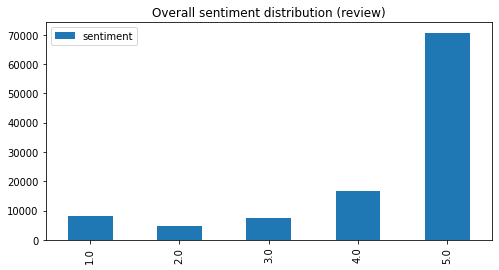

In [ ]:
aux_df = pd.DataFrame(df['sentiment'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (review)', figsize=(8, 4))

In [ ]:
#Creamos función para separar el dataset escogiendo las reseñas menores que de 5 estrellas como negativas y las de 5 como positivas. Lo divido así visto las desproporción entre reseñas.
#La mayoría de reseñas son positivas. Es cierto que las reseñas de 4 estrellas seguramente tenga muchas palabras positivas y quizás pueda afectar al modelo, pero más adelante corregimos ese error,
#, gracias a wordcloud, descubriendo que palabras deberíamos eliminar de las reseñas negativas para entrenar mejor el modelo.

def label_sentiment(row):
    if int(row['sentiment']) < 5:
        return 0
    else:
        return 1

In [ ]:
df['sentiment_label'] = df.apply(lambda row: label_sentiment(row), axis=1)

In [ ]:
df.head()

,review,sentiment,sentiment_label
0,well see post critical review one not getting ...,1.0,0
1,strongly reccomend buy matter beginner guitar ...,5.0,1
2,small thought job,5.0,1
3,sick pedal tiny box smaller thought would but ...,5.0,1
4,love string,4.0,0


In [ ]:
print(len(df[df['sentiment_label']== 1]))
print(len(df[df['sentiment_label']== 0]))

70669
36965


Vemos que las reviews están desbalanceadas, pero como tenemos demasiados datos, reducimos los datos de las reviews positivas para que queden igual que las otras.

In [ ]:
filas_a_borrar= df[df['sentiment_label']== 1]
num_filas_a_borrar = len(df[df['sentiment_label']== 1])- (len(df[df['sentiment_label']== 1])- len(df[df['sentiment_label']== 0]))

filas_a_borrar = filas_a_borrar.sample(frac=1)
filas_a_borrar = filas_a_borrar.iloc[num_filas_a_borrar:]
df = df.drop(filas_a_borrar.index)

In [ ]:
len(df)

73930

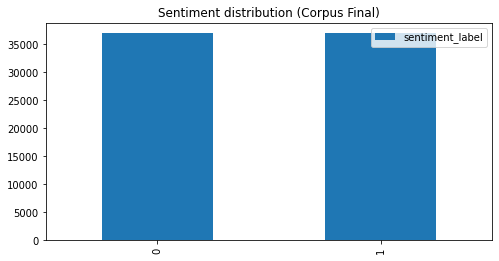

In [ ]:
#Vemos que ahora si tenemos un dataset balanceado
aux_df = pd.DataFrame(df['sentiment_label'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Sentiment distribution (Corpus Final)', figsize=(8, 4))

In [ ]:
#echamos un vistazo a lo que tenemos
df.head(20)

,review,sentiment,sentiment_label
0,well see post critical review one not getting ...,1.0,0
1,strongly reccomend buy matter beginner guitar ...,5.0,1
2,small thought job,5.0,1
3,sick pedal tiny box smaller thought would but ...,5.0,1
4,love string,4.0,0
5,great ukulele at first scared took month get t...,5.0,1
6,nice item,5.0,1
7,this true singing bowl resonate sing either hi...,1.0,0
8,bought keyboard plug this plug easy find good ...,5.0,1
9,get these bought two pair one one husband we a...,5.0,1


In [ ]:
#Dejo comentada una función con la que borré palabras mezcladas con números que aparentemente podrían ensuciar nuestro corpus, pero curiosamente empeora nuestro accuracy al entrenar, seguramente
# al usar el inglés serán maneras de escribir en su argot. Decidimos de momento  omitir esta función.

###############################################################

#Al ver palabras mezcladas con números, que la función no ha sido capaz de convertirnos a palabras como(dd65, 5th, sm48 etc.), las eliminamos.

#import re
#patron = r'\b\w*\d\w*\b' #expresión regular que busca palabras que contienen almenos un número y con la función re.sub reemplazaremos cualquier palabra-número por una cadena vacía.
#df['review'] = df['review'].apply(lambda x: re.sub(patron, '', x))

Más abajo, usando el wordcloud, Veo que 'good', 'great' y 'well', tienen fuerza en las reseñas negativas. Esto es por que como aquellas reseñas de menos de 5 estrellas las hemos clasificado en negativas seguramente muchas de 4 estrellas digan aspectos positivos, por ello decido borrar esas palabras de aquellas reviews negativas, así dejo el modelo más equilibrado y no se confunde al ver palabras positivas como negativas.

In [ ]:
#Creamos una función para borrar palabras que caracterizan más un texto positivo que uno negativo y que sin embargo tienen mucho peso en las reseñas negativas.

import re

def delete_words_cloud (row):
  delete_words = ['good','great', 'well']
  column_condition = 'sentiment_label'
  if row[column_condition] == 0:
    text = row['review']

    patron = re.compile(r'\b('+'|'.join(delete_words)+r')\b')
    new_text= patron.sub('', text)

    return new_text
  else:
    return row['review']

df['review'] = df.apply(delete_words_cloud, axis = 1)

In [ ]:
#Comenzamos a crear nuestro modelo, dividimos entre train y test.

import gensim
import multiprocessing as mp

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Dense,
    Dropout,
    Embedding,
    LSTM,
)
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['review'],
    df['sentiment_label'],
    train_size=0.75, #Elegimos el 75% de los datos para train y el 25% para test
    test_size=0.25,
    random_state=42,
    shuffle=True
)

In [ ]:
#Vemos la media de palabras por review y la review que más palabras tiene, lo usamos para eleigir el numero de palabras a usar en el modelo.
#Usaremos 500 y observamos resultados.

max = 0
mean = []
for example in X_train:
  length = len(example)
  mean.append(len(example))
  if length > max:
    max = length

In [ ]:
print(sum(mean) / len(mean))
print(max)

152.86616047757317
7239


**Exploramos los datos y vemos que tenemos**

In [ ]:
X_train.iloc[:10]

29082    very satisfied with this purchase good price g...
41298    an excellent bag wish could kept edm returned ...
23821                                         stick  money
74081    cello bow even violin viola bow nothing like p...
57343                             not picture quality poor
69744    used venetian blind one side would stay works ...
95427    decent bag quality fair single stitching alrea...
60473                    cheap get pay ok small child play
92420    awful awful awful completely fell apart minima...
28095    better expected we adjust smaller bigger shape...
Name: review, dtype: object

In [ ]:
X_train_words = pd.DataFrame(X_train, columns=["review"])
X_test_words = pd.DataFrame(X_test, columns=["review"])

In [ ]:
X_train_words.head()

,review
29082,very satisfied with this purchase good price g...
41298,an excellent bag wish could kept edm returned ...
23821,stick money
74081,cello bow even violin viola bow nothing like p...
57343,not picture quality poor


In [ ]:
#Preparamos los datos para el wordcloud y vemos que más podemos mejorar de nuestro dataset.

result_positive= df.loc[df['sentiment_label'] == 1, 'review']
result_negative = df.loc[df['sentiment_label'] == 0, 'review']
text_positive = ''
text_negative = ''

for review in result_positive:
  text_positive += review

for review in result_negative:
  text_negative += review


In [ ]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


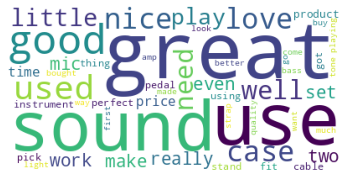

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from wordcloud import WordCloud, STOPWORDS

# Inicializamos el wordcloud
wc = WordCloud(background_color='white', max_words=50,
        # Actualizamos las stopwords para incluir palabras comunes del tema
        stopwords = STOPWORDS.update(['one','guitar','string']))

plt.imshow(wc.generate(text_positive))
plt.axis('off')
plt.show()

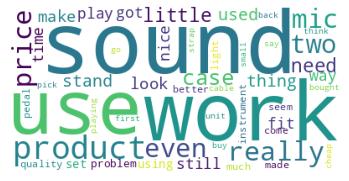

In [ ]:
wc = WordCloud(background_color='white', max_words=50,
        # Actualizamos las stopwords para incluir palabras comunes del tema
        stopwords = STOPWORDS.update(['good','great', 'well']))

plt.imshow(wc.generate(text_negative))
plt.axis('off')
plt.show()

In [ ]:
df.shape

(73930, 3)

In [ ]:
df.head()


,review,sentiment,sentiment_label
0,see post critical review one not getting corr...,1.0,0
1,strongly reccomend buy matter beginner guitar ...,5.0,1
4,love string,4.0,0
7,this true singing bowl resonate sing either hi...,1.0,0
10,case suck plain simple guitar sliding around c...,1.0,0


En las negativas, vemos que están fuertemente marcadas las palabras 'great'. 'good', y 'use'. Las eliminamos aver que pasa, y vemos que aún podemos filtar más palabras para mejorar sus predicciones.

**PASO 3: ETAPA DE ENTRENAMIENTO Y TESTEO DE UN MODELO DE ANÁLISIS DE SENTIMIENTO**

In [ ]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#Funcion para generar el tokenizador

def generate_tokenizer(train_df):
    tokenizer = Tokenizer() #Instanciamos el tokenizador y entrenamos
    tokenizer.fit_on_texts(train_df)
    vocab_size = len(tokenizer.word_index) + 1
    print(f"Total words: {vocab_size}")
    return tokenizer, vocab_size

In [ ]:
# Parámetros del WORD2VEC
W2V_SIZE = 300 # dimensión de los vectores, es decir, cada palabra será representada por un vector de 300 dimensiones, o mejor dicho por una lista de 300 números reales.
W2V_WINDOW = 7 # número de palabras que va a mirar alrededor
# 32
W2V_EPOCH = 5 # número de epocas que entrenamos el modelo w2v
W2V_MIN_COUNT = 2 #número mínimo de frecuencia con que aparece cada palabra, las palabras por debajo de esta frecuencia se ignoran.

# KERAS
SEQUENCE_LENGTH = 500 # número de secuencias de keras

In [ ]:
#Función para pasar de palabras a vectores, preparando los datos para el modelo.
#No indicamos el algoritmo que usamos pero por defecto, usa el CBOW, que a partir de un contexto de palabras tratará de predecir la palabra objetivo.
#Es cierto que es un algoritmo que puede funcionar mejor en corpus grandes y lo ideal seria probar con los dos y valorar resultados pero viendo los buenos resultados obtenidos
# y la falta de GPU lo dejamos así.

def generate_word2vec(train_df):
    documents = [_text.split() for _text in train_df.review]
    w2v_model = gensim.models.word2vec.Word2Vec(
        size=W2V_SIZE,
        window=W2V_WINDOW,
        min_count=W2V_MIN_COUNT,
        workers=mp.cpu_count(), #aqui elegimos el número de nucleos que se utilizarán para entrenar el modelo.
    )
    w2v_model.build_vocab(documents) #contruimos el vocabulario, asignando un ID único a cada palabra única y construye una tabla de frecuencia de palabras utilizada en el entrenamiento.

    words = w2v_model.wv.vocab.keys()
    vocab_size = len(words)
    print(f"Vocab size: {vocab_size}")
    w2v_model.train(documents, total_examples=len(documents), epochs=W2V_EPOCH)

    return w2v_model

In [ ]:
#Función para generar el embedding, creando una matrix de ceros que luego iremos rellenando con los vectores creados por
#word to vec.

def generate_embedding(word2vec_model, vocab_size, tokenizer):
    embedding_matrix = np.zeros((vocab_size, W2V_SIZE)) #matrix de ceros con las dimensiones del vocabulario y del w2v
    for word, i in tokenizer.word_index.items():
        if word in word2vec_model.wv:
            embedding_matrix[i] = word2vec_model.wv[word] #sustituimos los valores de la matrix por las palabras vectorizadas.
    return Embedding(
        vocab_size,
        W2V_SIZE,
        weights=[embedding_matrix],
        input_length=SEQUENCE_LENGTH,
        trainable=False,
    )



**APLICAMOS LAS FUNCIONES CREADAS**

In [ ]:


tokenizer, vocab = generate_tokenizer(X_train_words.review)
tokenizer_test, vocab_test = generate_tokenizer(X_test_words.review)



Total words: 32258
Total words: 18557


In [ ]:
word2vec_model = generate_word2vec(X_train_words)
word2vec_model_test = generate_word2vec(X_test_words)


Vocab size: 17340
Vocab size: 10187


In [ ]:
from tensorflow.keras.utils import pad_sequences


max_words = 500

X_train_words = pad_sequences(tokenizer.texts_to_sequences(X_train_words.review), maxlen=max_words)
X_test_words = pad_sequences(tokenizer.texts_to_sequences(X_test_words.review), maxlen=max_words)

**CREAMOS LA CAPA DE EMBEDDING Y EL MODELO**

**Entrenamos nuestro modelo con una RNN + word2vec Embedding**

In [ ]:
import numpy as np
embedding_layer = generate_embedding(word2vec_model, vocab, tokenizer)

In [ ]:
model_custom = Sequential()
#pasamos directamente la capa que hemos generado
model_custom.add(embedding_layer)
model_custom.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model_custom.add(Dense(1, activation="sigmoid"))

In [ ]:
#Observamos las características de nuestro modelo formado por nuestro embedding y una  capa lstm.
model_custom.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 300)          9677400   
                                                                 
 lstm (LSTM)                 (None, 100)               160400    
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 9,837,901
Trainable params: 160,501
Non-trainable params: 9,677,400
_________________________________________________________________


In [ ]:
model_custom.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#Entrenamos el modelo con una sola época debido al tiempo requerido de entrenamiento y analizamos resultados.

batch_size = 64
num_epochs = 1

X_train_words_valid, y_valid = X_train_words[:batch_size], y_train[:batch_size]  # first batch_size samples
X_train_words2, y_train2 = X_train_words[batch_size:], y_train[batch_size:]  # rest for training

model_custom.fit(X_train_words2, y_train2,
          validation_data=(X_train_words_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

866/866 [==============================] - 1250s 1s/step - loss: 0.3643 - accuracy: 0.8352 - val_loss: 0.3663 - val_accuracy: 0.8281


In [ ]:
scores = model_custom.evaluate(X_test_words, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])

Test accuracy: 0.8434236645698547


**Conclusiones**:

Observamos que el modelo nos da unos resultados muy buenos para haber sido entrenado con tan solo una época. El haber eliminado algunas stopwords que tenían un fuerte peso en los datos 'negativos' nos ha mejorado bastante el modelo.
En general vemos que la limpieza y preprocesado ha sido crucial para obtener un buen accuracy, aunque tambien el modelo con redes neuronales nos ha ayudado a encontrar óptimos patrones predictivos.
Nos quedamos contentos con el resultado, un accuracy de 0,84 en test y con una sola época.

**PROBAMOS CON GRU Y COMPARAMOS RESULTADOS**

In [ ]:
from keras.layers import Embedding, LSTM, Dense, Dropout, GRUV2, SimpleRNN
embedding_size = 32
model_gru = Sequential()
model_gru.add(Embedding(vocab, embedding_size, input_length=max_words)) #En este caso usamos la capa de embedding de Keras.
model_gru.add(GRUV2(100))
model_gru.add(Dense(1, activation='sigmoid'))

print(model_gru.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           1032256   
                                                                 
 gru (GRU)                   (None, 100)               40200     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,072,557
Trainable params: 1,072,557
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
batch_size = 64
num_epochs = 1

X_train_words_valid, y_valid = X_train_words[:batch_size], y_train[:batch_size]  # first batch_size samples
X_train_words2, y_train2 = X_train_words[batch_size:], y_train[batch_size:]  # rest for training

model_gru.fit(X_train_words2, y_train2,
          validation_data=(X_train_words_valid, y_valid),
          batch_size=batch_size, epochs=num_epochs)

866/866 [==============================] - 77s 86ms/step - loss: 0.3763 - accuracy: 0.8229 - val_loss: 0.3137 - val_accuracy: 0.9062


In [ ]:
scores = model_gru.evaluate(X_test_words, y_test, verbose=0)  # returns loss and other metrics specified in model.compile()
print("Test accuracy:", scores[1])

Test accuracy: 0.865714430809021


**PASO 4: CONCLUSIONES FINALES**

   Vemos que con Gru mejoramos el modelo en test obteniendo un accuracy de 0,86 respecto al 0,84 con LSTM y al usar menos parámetros y menos complejidad computacional, entrena mucho más rápido.
   Al igual que con el anterior modelo, los resultados son más que decentes al entrenar solo una época y la cantidad de datos que hemos usado-
  En definitiva, podemos comprobar el avance exponencial que esta habiendo en el procesamiento del lenguaje natural y la inmensa  cantidad de recursos y herramientas que podemos usar para obtener resultados óptimos usando las redes neuronales.
Técnicamente he observado también,  una mejora brutal al hacer mucho hincapié en el preprocesado. En un primer momento obtuve un accuracy de 0,76 y tras revisar de nuevo los datos y darles una segunda limpieza, lo he mejorado un 10% Obteniendo un accuracy de 0,85.